In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('Studyhours.csv')
x = data[['StudyHours']].values
y = data['Marks'].values

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [5]:
X_b = np.c_[np.ones((len(X_scaled), 1)), X_scaled]

In [6]:
theta = np.random.randn(2)
n_epochs = 50
eta = 0.1

history_theta = []
history_loss = []

In [8]:
for epoch in range(n_epochs):
    y_pred = X_b.dot(theta)
    loss = np.mean((y_pred - y)**2)
    gradients = 2 / len(X_b) * X_b.T.dot(y_pred - y)
    theta -= eta*gradients
    history_theta.append(theta.copy())
    history_loss.append(loss)

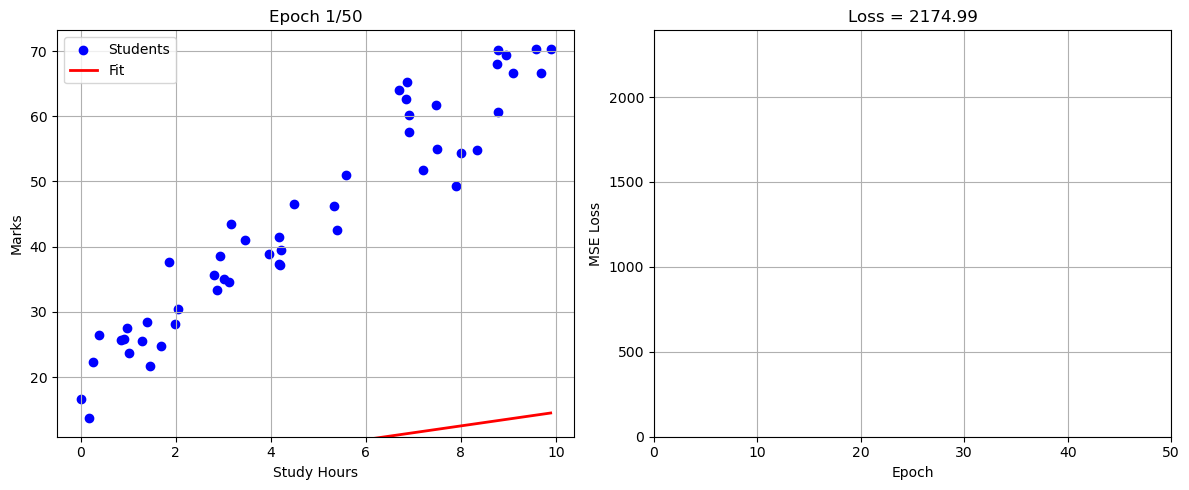

In [11]:
fig, (ax_data, ax_loss) = plt.subplots(1, 2, figsize=(12, 5))
ax_data.scatter(x, y, color='blue', label='Students')
line_fit, = ax_data.plot([], [], 'r-', linewidth=2, label='Fit')
ax_data.set_xlabel('Study Hours')
ax_data.set_ylabel('Marks')
ax_data.legend()
ax_data.grid(True)

ax_loss.set_xlim(0, n_epochs)
ax_loss.set_ylim(0, max(history_loss) * 1.1)
line_loss, = ax_loss.plot([], [], 'g-', linewidth=2)
ax_loss.set_xlabel('Epoch')
ax_loss.set_ylabel('MSE Loss')
ax_loss.grid(True)

def animate(i):
    b, m = history_theta[i]
    x_vals = np.array([X_scaled.min(), X_scaled.max()])
    y_vals = b + m * x_vals
    x_orig = scaler.inverse_transform(x_vals.reshape(-1, 1)).flatten()
    line_fit.set_data(x_orig, y_vals)

    ax_data.set_title(f'Epoch {i+1}/{n_epochs}')
    xs = np.arange(i + 1)
    ys = history_loss[:i + 1]
    line_loss.set_data(xs, ys)
    ax_loss.set_title(f'Loss = {history_loss[i]:.2f}')
    return line_fit, line_loss

ani = animation.FuncAnimation(fig, animate, frames=n_epochs, interval=200, blit=True)

plt.tight_layout()
plt.show()